In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [2]:
ds = xr.open_mfdataset("../era5/era5-nordics-frost-days.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:                           (latitude: 73, longitude: 111, time: 1)
Coordinates:
  * time                              (time) datetime64[ns] 2018-08-31T11:30:00
  * longitude                         (longitude) float32 4.5 4.75 5.0 5.25 ...
  * latitude                          (latitude) float32 71.5 71.25 71.0 ...
Data variables:
    frost_days_index_per_time_period  (time, latitude, longitude) float32 dask.array<shape=(1, 73, 111), chunksize=(1, 73, 111)>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Thu Dec 13 21:44:58 2018: cdo eca_fd era5-nordics-t2m_k_dai...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

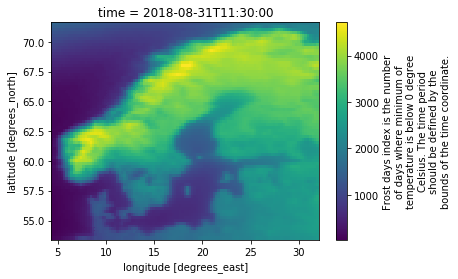

In [5]:
ds.frost_days_index_per_time_period.plot()

In [6]:
lons, lats = np.meshgrid(ds.longitude, ds.latitude)

In [7]:
lons

array([[ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       ...,
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ]], dtype=float32)

In [8]:
psr = xr.open_dataset("pine_spruce.nc")

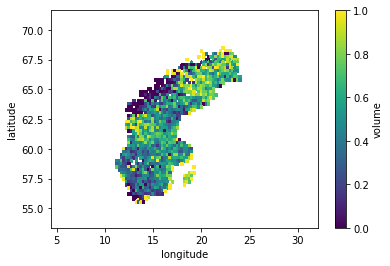

In [9]:
psr.volume.plot()

In [10]:
df = pd.DataFrame()

In [11]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [12]:
data.keys()

dict_keys(['ratio'])

In [13]:
data["frost"] = ds.frost_days_index_per_time_period.values.ravel()

In [14]:
df = pd.DataFrame(data)

In [15]:
df.dropna(inplace=True)

In [16]:
df = df[df["ratio"] > 0]

In [17]:
df.columns[1:]

Index(['frost'], dtype='object')

In [18]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [20]:
X_train

,frost
2054,4098.0
3044,3543.0
2393,3839.0
3175,2998.0
5581,1772.0
6366,2108.0
6587,1983.0
2726,3768.0
3591,3262.0
3486,3308.0


In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
y_pred = rf.predict(X_test)

In [23]:
mean_squared_error(y_test, y_pred)

0.07149263161848048

In [24]:
r2_score(y_test, y_pred)

-0.11888132728675127

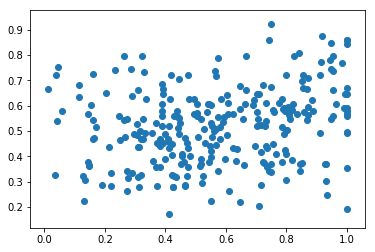

In [25]:
plt.scatter(y_test, y_pred)

In [26]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [27]:
df_results

,observed,predicted
5139,0.271750,0.549299
1954,0.316243,0.500295
5247,0.399872,0.387441
2162,0.413025,0.170205
6581,1.000000,0.670974
3278,0.529229,0.450914
2841,0.791920,0.487581
2490,0.605064,0.642983
5028,0.503029,0.571182
6035,0.135578,0.307780


In [28]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [29]:
feature_importances

,importance
sr12,0.129438
sr09,0.115421
sr03,0.112398
sr04,0.096970
sr06,0.096816
sr10,0.083973
sr07,0.069154
sr02,0.067928
sr11,0.067761
sr05,0.066722


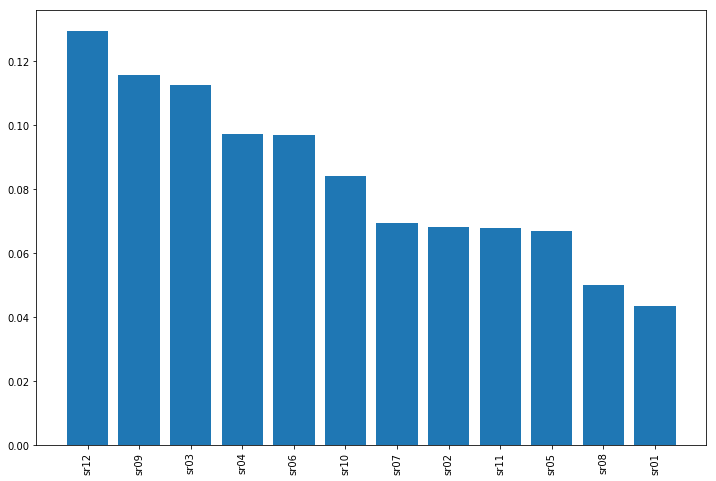

In [30]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()